## Title: CORRELATION MODEL IN THE ADOPTION OF E-PAYMENT SERVICES

## Import Libraries

In [1]:
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, accuracy_score
%matplotlib inline

## Read CSV

In [2]:
df = pd.read_csv("E-payment Cryptocurrency Coin.csv")

## Check All Columns

In [3]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'Mobile Phone (H/p)',
       'Where were you born? ', 'Where are you residing now? ', 'Q1. Age',
       'Q2. Gender', 'Q3. What is your marital status?',
       'Q4. What is your highest level of education?',
       'Q5. What industry do you work in?',
       'Q6. What is your position level at work?',
       '1. Do you own any of the following?',
       '2. What operating system does your smartphone/Tablet operate?',
       '3. Have you made any electronic payments in the past 12 months?',
       '4. Investment Portfolio (Tick what is relevant)',
       '5. Investment Cryptocurrency Coin (Tick what is relevant)',
       '6. E-payment purchasing, Loyalty Points and Crypto Coin [(1) Have you ever purchased anything using the E-payment mode?]',
       '6. E-payment purchasing, Loyalty Points and Crypto Coin [(2) In the next six months, do you plan to purchase anything using the E-payment mode?]',
       '6. E-payment purchasing, Loyalty Points and Cry

## General Functions

In [4]:
def show_df(df):
    # Show 6 Columns
    return 0

Task a:\
Split Columns into respective groups\
The easier way of categorization is the UTAUT Factors.
However, from last time, we notice by just using UTAUT factors, we have disregarded some important features.\
So, therefore, this time more emphasis will be placed on the factors we disregarded.
Futhermore, more emphasis will be used on confusion matrix, as we learn precision, recall, f1-score.
Best of luck Xi En
The end goal is to make an api that reads Excel File sheet and produce features.

## Demographic Factors

In [5]:
df.columns[:6]

Index(['Timestamp', 'Name', 'Email', 'Mobile Phone (H/p)',
       'Where were you born? ', 'Where are you residing now? '],
      dtype='object')

## Q1- Q6 Questions

In [6]:
df.columns[6:28]

Index(['Q1. Age', 'Q2. Gender', 'Q3. What is your marital status?',
       'Q4. What is your highest level of education?',
       'Q5. What industry do you work in?',
       'Q6. What is your position level at work?',
       '1. Do you own any of the following?',
       '2. What operating system does your smartphone/Tablet operate?',
       '3. Have you made any electronic payments in the past 12 months?',
       '4. Investment Portfolio (Tick what is relevant)',
       '5. Investment Cryptocurrency Coin (Tick what is relevant)',
       '6. E-payment purchasing, Loyalty Points and Crypto Coin [(1) Have you ever purchased anything using the E-payment mode?]',
       '6. E-payment purchasing, Loyalty Points and Crypto Coin [(2) In the next six months, do you plan to purchase anything using the E-payment mode?]',
       '6. E-payment purchasing, Loyalty Points and Crypto Coin [(3) Do you plan to purchase any gifts/tickets etc this year using the E-payment mode?]',
       '6. E-payment pur

## UTAUT Factors

In [7]:
df.columns[28:]

Index(['PE1: I find Blockchain / Cryptocurrency Coin useful in me.',
       'PE2: Using Blockchain / Cryptocurrency Coin enables me to accomplish tasks more quickly.',
       'PE3: Using Blockchain / Cryptocurrency Coin increases my productivity.',
       'PE4: Using Blockchain / Cryptocurrency Coin increases my chances of getting more choices.',
       'EE1: My interaction with Blockchain / Cryptocurrency Coin is clear and understandable.',
       'EE2: It is easy for me to become skillful at using Blockchain / Cryptocurrency Coin.',
       'EE3: I find Blockchain / Cryptocurrency Coin easy to use.',
       'EE4: Learning to operate Blockchain / Cryptocurrency Coin is easy for me.',
       'AT1: Using Blockchain / Cryptocurrency Coin is a good idea.',
       'AT2: Blockchain / Cryptocurrency Coin makes effort more interesting.',
       'AT3: Working with Blockchain / Cryptocurrency Coin is fun.',
       'AT4: I like working with Blockchain / Cryptocurrency Coin.',
       'SI1: People 

## Feature engineer section 2 Questions

In [8]:
tmp_df = df.iloc[:, 6:28]

col_len = tmp_df.shape[1]
for col_ind in range(0, col_len, 6):
    display(tmp_df.iloc[:5, col_ind:col_ind + 6])

,Q1. Age,Q2. Gender,Q3. What is your marital status?,Q4. What is your highest level of education?,Q5. What industry do you work in?,Q6. What is your position level at work?
0,< 25 years,Female,Single,College/university,Baking / Finance,Other
1,< 25 years,Female,Single,College/university,Other,Other
2,41 - 55 years,Female,Single,College/university,Manufacturing,Middle management
3,< 25 years,Male,Single,College/university,Education,Other
4,< 25 years,Female,Single,College/university,Other,Other


,1. Do you own any of the following?,2. What operating system does your smartphone/Tablet operate?,3. Have you made any electronic payments in the past 12 months?,4. Investment Portfolio (Tick what is relevant),5. Investment Cryptocurrency Coin (Tick what is relevant),"6. E-payment purchasing, Loyalty Points and Crypto Coin [(1) Have you ever purchased anything using the E-payment mode?]"
0,"Mobile Smartphone;Bank Cards (Credit, Debit, P...","Android (Samsung, etc)","Yes (Mobile);Yes (Bank Cards (i.e. Credit, Deb...",Stocks,pi,Yes
1,"Mobile Smartphone;Bank Cards (Credit, Debit, P...","Android (Samsung, etc)","Yes (Bank Cards (i.e. Credit, Debit, Pre-paid))",Other,No,Yes
2,"Mobile Smartphone;Bank Cards (Credit, Debit, P...","Android (Samsung, etc)","Yes (Bank Cards (i.e. Credit, Debit, Pre-paid)...",Crypto;Other,Ethereum,Yes
3,"Mobile Smartphone;Bank Cards (Credit, Debit, P...","Android (Samsung, etc)","Yes (Mobile);Yes (Bank Cards (i.e. Credit, Deb...",Currency;Other,No,No
4,"Mobile Smartphone;Bank Cards (Credit, Debit, P...",iOS (iPhone),"Yes (Mobile);Yes (Bank Cards (i.e. Credit, Deb...",Currency,No,Yes


,"6. E-payment purchasing, Loyalty Points and Crypto Coin [(2) In the next six months, do you plan to purchase anything using the E-payment mode?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(3) Do you plan to purchase any gifts/tickets etc this year using the E-payment mode?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(4) Do you have the Investment in Crypto?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(5) Do you plan to convert your Crypto Investment to Crypto Coins for E-payment?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(6) Do you have the loyalty points that can be used for E-payment transactions?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(7) Are you interested to turn your loyalty points into Crypto coins for E-payment?]"
0,Yes,Yes,No,No,Yes,No
1,Yes,No,No,No,No,No
2,Yes,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,No,No,Yes,No
4,Yes,Yes,No,Yes,No,Yes


,"6. E-payment purchasing, Loyalty Points and Crypto Coin [(8) Do you like to have the credit/debit card, e-wallet, Crypto Coin on a single platform for E-payment transactions?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(9) Do you like to have the platform of a survey redemption solution for Crypto Coin E-payment transactions?]","6. E-payment purchasing, Loyalty Points and Crypto Coin [(10) Do you like the points collected from shopping that can be used for Crypto Coin E-payment transactions?]",Type of gifts you like
0,No,No,No,Shopping Voucher;Cryptocurrency Coin;Loyalty P...
1,No,No,No,Airline / Holiday Voucher;Money in my e-wallet...
2,Yes,Yes,Yes,Cryptocurrency Coin;Money in my e-wallet (e.g:...
3,Yes,No,No,Shopping Voucher;Loyalty Points;Food Voucher;M...
4,Yes,No,Yes,Shopping Voucher;Cryptocurrency Coin;Loyalty P...


## Let's Analyze the features individually!

### Function that extracts all unique values and converts into a dataframe

In [9]:
def df_unique(arr):
    tmp_keys = []
    for val in arr:
        if type(val) != str:
            continue
        tmp_list = val.split(";")
        for val2 in tmp_list:
            if val2 not in tmp_keys:
                tmp_keys.append(val2)
    
    tmp_df = pd.DataFrame(columns = tmp_keys)
    for val in arr:
        if type(val) != str:
            continue
        tmp_dict = {i:0 for i in tmp_keys}
        tmp_list = val.split(";")
        for val2 in tmp_list:
            tmp_dict[val2] += 1
        tmp_df = tmp_df.append(tmp_dict, ignore_index = True) 
    
    return tmp_df

In [10]:
tmp_col = tmp_df.iloc[:, 6]
print(tmp_col.name)
q1 = df_unique(tmp_col)
q1.head(5)

1. Do you own any of the following?


,Mobile Smartphone,"Bank Cards (Credit, Debit, Pre-paid)",Touch n Go,Internet Services (e.g: Broadband),E-wallet account (E.g: MOL or PayPal),"Internet of Things gadget (e.g: Fitbit – measure steps, etc)",Blockchain / Cryptocurrency Coin,HealthCare Gadget (E.g: Blood pressure measure device etc),"Touch n Go, EzLink etc"
0,1,1,1,1,1,0,0,0,0
1,1,1,1,1,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0
3,1,1,1,1,0,1,0,0,0
4,1,1,1,1,1,0,1,0,0


2. What operating system does your smartphone/Tablet operate?

In [11]:
tmp_col = tmp_df.iloc[:, 7]
print(tmp_col.name)
q2 = df_unique(tmp_col)
q2.head(5)

2. What operating system does your smartphone/Tablet operate?


,"Android (Samsung, etc)",iOS (iPhone),Microsoft phone
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [12]:
tmp_col = tmp_df.iloc[:, 8]
print(tmp_col.name)
q3 = df_unique(tmp_col)
q3.head(5)

3. Have you made any electronic payments in the past 12 months?


,Yes (Mobile),"Yes (Bank Cards (i.e. Credit, Debit, Pre-paid))",Yes (Touch n Go),Yes (Internet Services (e.g: Broadband)),Yes (E-wallet account (E.g: MOL or PayPal)),Yes (Blockchain / Cryptocurrency Coin solutions),No,"Yes (Touch n Go, Ezlink etc)"
0,1,1,1,1,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0
3,1,1,1,1,0,0,0,0
4,1,1,1,0,0,0,0,0


In [13]:
tmp_col = tmp_df.iloc[:, 9]
print(tmp_col.name)
q4 = df_unique(tmp_col)
q4.head(5)

4. Investment Portfolio (Tick what is relevant)


,Stocks,Other,Crypto,Currency,Commodity,Indices
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,1,0,0,0
3,0,1,0,1,0,0
4,0,0,0,1,0,0


In [14]:
tmp_col = tmp_df.iloc[:, 10]
print(tmp_col.name)

tmp_keys = ["No", "Bitcoin", "Ethereum", "LiteCoin", "Ripple (XPR)", "Defi Coin", "Ontime or Intime", "pi"]
q5 = pd.DataFrame(columns = tmp_keys)
    
for val in tmp_col:
    if type(val) != str:
        continue
    tmp_dict = {i:0 for i in tmp_keys}
    tmp_list = val.split(";")
    for val2 in tmp_list:
        if val2 in tmp_keys:
            tmp_dict[val2] += 1
    q5 = q5.append(tmp_dict, ignore_index = True) 

q5.head(5)

5. Investment Cryptocurrency Coin (Tick what is relevant)


,No,Bitcoin,Ethereum,LiteCoin,Ripple (XPR),Defi Coin,Ontime or Intime,pi
0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [15]:
tmp_col = tmp_df.iloc[:, 21]
print(tmp_col.name)
q21 = df_unique(tmp_col)
q21.head(5)

Type of gifts you like


,Shopping Voucher,Cryptocurrency Coin,Loyalty Points,Food Voucher,"Money in my e-wallet (e.g: TnG, Boost, Grab etc)",Airline / Holiday Voucher,Taxi / Transport Voucher,International wallet,Anything,Cashback,gift card
0,1,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,0


## Feature Engineering for UTAUT Factors

In [16]:
tmp_df = df.iloc[:, 28: ]
tmp_df

,PE1: I find Blockchain / Cryptocurrency Coin useful in me.,PE2: Using Blockchain / Cryptocurrency Coin enables me to accomplish tasks more quickly.,PE3: Using Blockchain / Cryptocurrency Coin increases my productivity.,PE4: Using Blockchain / Cryptocurrency Coin increases my chances of getting more choices.,EE1: My interaction with Blockchain / Cryptocurrency Coin is clear and understandable.,EE2: It is easy for me to become skillful at using Blockchain / Cryptocurrency Coin.,EE3: I find Blockchain / Cryptocurrency Coin easy to use.,EE4: Learning to operate Blockchain / Cryptocurrency Coin is easy for me.,AT1: Using Blockchain / Cryptocurrency Coin is a good idea.,AT2: Blockchain / Cryptocurrency Coin makes effort more interesting.,...,AX3: I hesitate to use Blockchain / Cryptocurrency Coin for fear of making mistakes I cannot correct.,AX4: Blockchain / Cryptocurrency Coin is somewhat intimidating to me.,T1: I feel comfortable using Blockchain / Cryptocurrency Coin.,T2: I feel the reliability to use Blockchain / Cryptocurrency Coin.,T3: I am glad about the service quality to use Blockchain / Cryptocurrency Coin.,T4: Blockchain / Cryptocurrency Coin Integrity is vital to me.,BI1: I intend to use Blockchain / Cryptocurrency Coin.,BI2: I plan to invest Blockchain / Cryptocurrency Coin.,BI3: I plan to have Blockchain / Cryptocurrency Coin as an E-Wallet.,BI4: I plan to use Blockchain / Cryptocurrency Coin for E-payment transaction to buy stuff.
0,2,2,2,2,3,3,3,3,4,4,...,4,3,2,1,2,3,3,3,3,3
1,1,1,1,1,1,1,1,1,3,3,...,4,4,2,2,2,2,2,2,2,2
2,4,5,4,5,3,2,2,2,4,4,...,4,3,3,3,3,4,3,4,4,4
3,3,3,3,3,2,3,3,3,4,3,...,3,3,3,3,3,3,4,4,3,3
4,3,3,4,4,3,4,3,4,5,4,...,4,4,3,4,4,4,4,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
282,3,3,3,3,3,3,3,3,3,3,...,4,3,3,3,3,3,3,3,3,3
283,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
284,4,4,4,4,4,4,4,4,4,4,...,3,3,4,4,4,4,4,4,4,4


### Rename Columns

In [17]:
tmp_df.columns = [i.split(": ")[0] for i in tmp_df.columns]

In [18]:
col_len = 20
for ind in range(0, tmp_df.shape[1], col_len):
    tmp_tmp_df = tmp_df.iloc[:, ind:ind + col_len]
    display(tmp_tmp_df.head(5))

,PE1,PE2,PE3,PE4,EE1,EE2,EE3,EE4,AT1,AT2,AT3,AT4,SI1,SI2,SI3,SI4,FC1,FC2,FC3,FC4
0,2,2,2,2,3,3,3,3,4,4,4,3,3,3,4,3,2,2,3,2
1,1,1,1,1,1,1,1,1,3,3,3,3,1,1,3,3,1,1,3,1
2,4,5,4,5,3,2,2,2,4,4,4,4,3,3,2,3,3,2,2,3
3,3,3,3,3,2,3,3,3,4,3,3,3,2,2,2,2,2,2,2,2
4,3,3,4,4,3,4,3,4,5,4,4,4,2,3,2,3,2,3,3,3


,SE1,SE2,SE3,SE4,AX1,AX2,AX3,AX4,T1,T2,T3,T4,BI1,BI2,BI3,BI4
0,2,4,4,4,3,4,4,3,2,1,2,3,3,3,3,3
1,1,1,1,1,5,5,4,4,2,2,2,2,2,2,2,2
2,2,3,3,4,3,4,4,3,3,3,3,4,3,4,4,4
3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3
4,4,4,4,3,5,4,4,4,3,4,4,4,4,5,4,4


### Seperate Target and Dependant Variables

In [19]:
col_ind = 0
df_X = tmp_df.drop(tmp_df.columns[col_ind], axis = 1)
df_Y = tmp_df.iloc[:, col_ind]

### Train Test Split Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=0)

### Random Forest Classifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = rf_model.predict(X_test)

### Classification Report

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, accuracy_score

In [24]:
clf_report_1 = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).T
clf_report_1

,precision,recall,f1-score,support
1,0.714286,1.000000,0.833333,5.000000
2,1.000000,0.666667,0.800000,9.000000
3,0.850000,0.918919,0.883117,37.000000
4,0.896552,0.866667,0.881356,30.000000
5,1.000000,0.800000,0.888889,5.000000
accuracy,0.872093,0.872093,0.872093,0.872093
macro avg,0.892167,0.850450,0.857339,86.000000
weighted avg,0.882767,0.872093,0.871246,86.000000


### Confusion Matrix

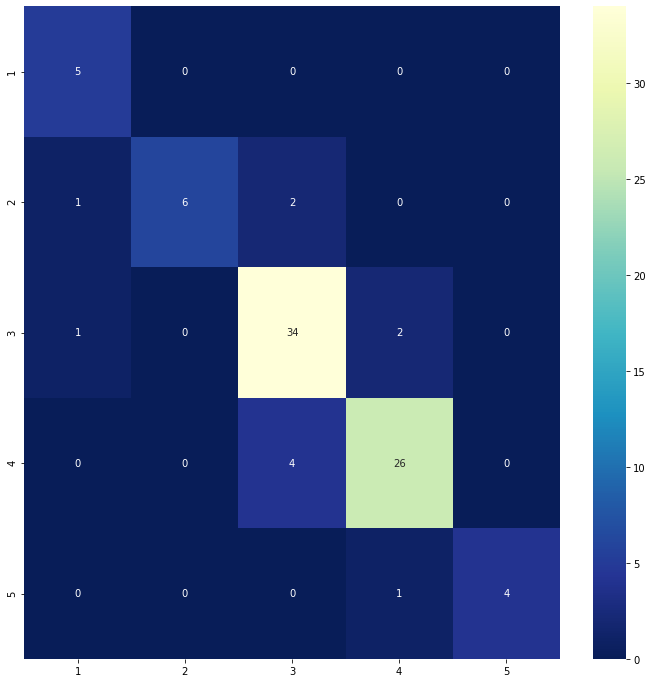

In [25]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = sorted(df_Y.unique()), columns = sorted(df_Y.unique()))
fig = plt.figure(figsize=(12,12))

sns.heatmap(confusion_matrix_df,annot=True, fmt='g',  cmap="YlGnBu_r")
plt.show()

### Accuracy Score

In [26]:
print(f"Accuracy: {round(accuracy_score(y_test, rf_model.predict(X_test)) * 100.0, 2)}%")

Accuracy: 87.21%


### Feature Importance

In [27]:
feats = {key:val for (key,val) in zip(df_X.columns, rf_model.feature_importances_)}

In [28]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', inplace = True, ascending = False)
print(importances.index[:5])

Index(['PE2', 'EE1', 'AT1', 'PE4', 'BI2'], dtype='object')


<AxesSubplot:>

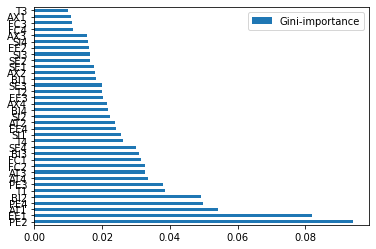

In [29]:
importances.plot(kind='barh')

## Now, make it a for loop!!

In [30]:
col_arr = ["Target Variable", "Accuracy", "1st", "2nd", "3rd", "4th", "5th"]
result_df = pd.DataFrame(columns = col_arr)

In [31]:
# for col_ind in range(0, tmp_df.shape[1]):
#     df_X = tmp_df.drop(tmp_df.columns[col_ind], axis = 1)
#     df_Y = tmp_df.iloc[:, col_ind]
    
#     # Train Test Split Model
#     X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3)
    
#     # Random Forest Classifier
#     rf_model = RandomForestClassifier(n_estimators=100)
#     rf_model.fit(X_train,y_train)
    
#     # Prediction
#     y_pred = rf_model.predict(X_test)
    
#     # Get 1st, 2nd, 3rd, 4th, 5h
#     feats = {key:val for (key,val) in zip(df_X.columns, rf_model.feature_importances_)}
#     importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#     importances .sort_values(by='Gini-importance', inplace = True, ascending = False)
    
#     # Store Values
#     tmp_dict = {}
    
#     tmp_dict = {key:val for (key, val) in zip(col_arr[2:], importances.index[:5])}
#     tmp_dict["Target Variable"] = tmp_df.columns[col_ind]
#     tmp_dict["Accuracy"] = accuracy_score(y_test, rf_model.predict(X_test))
    
#     # Store results into result_df
#     result_df = result_df.append(tmp_dict, ignore_index = True)

In [32]:
result_df

,Target Variable,Accuracy,1st,2nd,3rd,4th,5th


## Ok, what does the above value even mean???